In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import scipy.stats as st

# filepath = Path('/home/kuries/Desktop/sem/sem6/dip_lab/dataset/lena')

img = cv2.imread('Lenna.png', 0)

In [3]:
def display_image(img):
    plt.imshow(img, cmap='gray')
    plt.show()


def gaussian_kernel(klen=15, nsig=3):
    irange = (2*nsig+1.)/(klen)
    x = np.linspace(-nsig-irange/2., nsig+irange/2., klen+1)
    kernel = np.diff(st.norm.cdf(x))
    kernel = np.sqrt(np.outer(kernel, kernel))
    kernel = kernel/kernel.sum()
    return kernel

# def gkern(l=5, sig=1.):
#     ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
#     gauss = np.exp(-0.5 * np.square(ax) / np.square(sig))
#     kernel = np.outer(gauss, gauss)
#     return kernel / np.sum(kernel)

In [4]:
def gaussian_blur(f, h):
    h = np.fft.fft2(h, f.shape)
    f = np.fft.fft2(f)
    f = f*h
    f = np.fft.ifft2(f).real
    return f

def unblur_image(g, h):
    g = np.fft.fft2(g)
    h = np.fft.fft2(h, g.shape)
    g = g / h
    g = np.fft.ifft2(g).real
    return g

In [5]:
f = img.copy()
h = gaussian_kernel(9, 1)

noise = np.random.normal(0,1,img.size)
noise = noise.reshape(img.shape[0],img.shape[1]).astype('uint8')

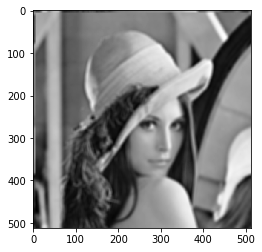

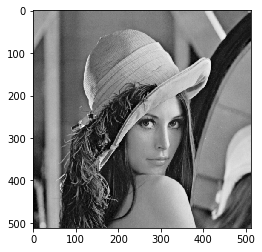

In [6]:
g = gaussian_blur(f, h)

display_image(g)
display_image(unblur_image(g, h))

In [6]:
def gaussian_blur_with_noise(f, h, noise):
    h = np.fft.fft2(h, f.shape)
    noise = np.fft.fft2(noise, f.shape)
    f = np.fft.fft2(f)

    f = f*h + noise
    f = np.fft.ifft2(f).real
    return f

def unblur_image_with_noise(g, h, noise):
    g = np.fft.fft2(g)
    h = np.fft.fft2(h, g.shape)
    noise = np.fft.fft2(noise, f.shape)

    g = g - noise
    g = g / h
    g = np.fft.ifft2(g).real
    return g

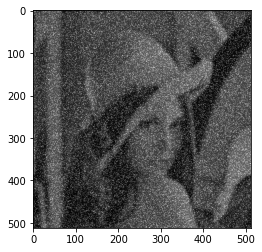

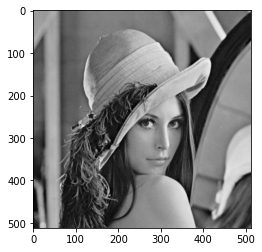

In [7]:
g_with_noise = gaussian_blur_with_noise(f, h, noise)

display_image(g_with_noise)
display_image(unblur_image_with_noise(g_with_noise, h, noise))